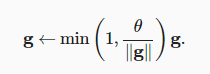

In [1]:
# 导包
%matplotlib inline

import math
import torch
from torch import nn
from torch.nn import functional as F
import dltools

In [2]:
# 加载time machine数据
batch_size, num_steps = 32, 35
# 默认需要从亚马逊aws云上面下载数据, 但是资源过期了, 下载不了了. 导致数据加载不了. 
train_iter, vocab = dltools.load_data_time_machine(batch_size=batch_size, num_steps=num_steps)

In [3]:
for x, y in train_iter:
    print(x, y)
    break

tensor([[ 2, 12, 12,  ...,  3,  1, 17],
        [16, 12,  4,  ...,  1,  7, 14],
        [ 4,  8,  1,  ...,  2,  4, 10],
        ...,
        [ 4, 21,  7,  ..., 21, 14, 10],
        [ 8, 20,  4,  ...,  1,  6,  7],
        [ 4, 15,  2,  ..., 20,  1,  4]]) tensor([[12, 12,  8,  ...,  1, 17,  5],
        [12,  4,  8,  ...,  7, 14, 10],
        [ 8,  1, 17,  ...,  4, 10,  6],
        ...,
        [21,  7, 14,  ..., 14, 10,  8],
        [20,  4, 10,  ...,  6,  7, 17],
        [15,  2, 11,  ...,  1,  4,  1]])


In [4]:
x.shape

torch.Size([32, 35])

In [5]:
y.shape

torch.Size([32, 35])

In [6]:
y.T.reshape(-1)

tensor([12, 12,  8,  ...,  8, 17,  1])

In [7]:
vocab.idx_to_token

['<unk>',
 ' ',
 'e',
 't',
 'a',
 'i',
 'n',
 'o',
 's',
 'h',
 'r',
 'd',
 'l',
 'm',
 'u',
 'c',
 'f',
 'w',
 'g',
 'y',
 'p',
 'b',
 'v',
 'k',
 'x',
 'z',
 'j',
 'q']

In [8]:
vocab.token_to_idx

{'<unk>': 0,
 ' ': 1,
 'e': 2,
 't': 3,
 'a': 4,
 'i': 5,
 'n': 6,
 'o': 7,
 's': 8,
 'h': 9,
 'r': 10,
 'd': 11,
 'l': 12,
 'm': 13,
 'u': 14,
 'c': 15,
 'f': 16,
 'w': 17,
 'g': 18,
 'y': 19,
 'p': 20,
 'b': 21,
 'v': 22,
 'k': 23,
 'x': 24,
 'z': 25,
 'j': 26,
 'q': 27}

In [9]:
len(vocab)

28

In [10]:
# 输入数据,我们是打算输入one_hot编码的数据
# pytorch提供了快速进行one_hot编码的工具
F.one_hot(torch.tensor([0, 2]), num_classes=len(vocab))

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]])

In [11]:
X = torch.arange(10).reshape((2, 5))
x = F.one_hot(X.T, 28)

In [12]:
x.shape

torch.Size([5, 2, 28])

In [13]:
X.T

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

In [14]:
x

tensor([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]],

        [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]],

        [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]],

        [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0

In [15]:
x[0].shape

torch.Size([2, 28])

In [16]:
# 初始化模型参数
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size
    
    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01
    
    # 隐藏层参数
    W_xh = normal((num_inputs, num_hiddens))
    W_hh = normal((num_hiddens, num_hiddens))
    b_h = torch.zeros(num_hiddens, device=device)
    
    # 输出层参数
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    
    # nn.Parameter(W_xh)
    # 把这些参数都设置requires_grad = True
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

In [17]:
get_params(28, 512, 'cuda:0')

[tensor([[-2.4242e-03, -1.6588e-03,  1.3155e-02,  ..., -3.6065e-03,
           2.0880e-02, -8.1554e-03],
         [ 7.6695e-03,  1.1533e-02, -5.6026e-03,  ..., -1.1850e-02,
           8.6364e-03, -4.4432e-03],
         [ 1.8461e-02, -9.4335e-03, -1.4104e-02,  ...,  1.0878e-02,
          -1.4981e-03, -1.8442e-02],
         ...,
         [-4.8452e-03, -1.7213e-02,  1.1575e-03,  ...,  8.4143e-03,
          -1.3197e-02,  8.8080e-03],
         [-1.3960e-02,  5.2733e-03,  2.9026e-03,  ..., -9.4597e-04,
          -4.4125e-03,  2.9028e-02],
         [-3.7395e-03,  6.6997e-03, -6.4649e-06,  ...,  4.9031e-03,
           5.2474e-03, -2.0866e-02]], device='cuda:0', requires_grad=True),
 tensor([[ 0.0015, -0.0065,  0.0126,  ..., -0.0129, -0.0156,  0.0060],
         [ 0.0043,  0.0178, -0.0010,  ...,  0.0097,  0.0078, -0.0052],
         [ 0.0049,  0.0029, -0.0042,  ...,  0.0014,  0.0023,  0.0146],
         ...,
         [-0.0024, -0.0130,  0.0033,  ..., -0.0080, -0.0106, -0.0123],
         [-0.0061, 

In [18]:
# 初始化时返回隐藏状态
def init_rnn_state(batch_size, num_hiddens, device):
    # 返回的是一个元组
    return (torch.zeros((batch_size, num_hiddens), device=device), )

In [19]:
# rnn主体结构
def rnn(inputs, state, params):
    # inputs的形状: (时间步数量, 批次大小, 词表大小)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    # X的shape: [批次大小, 词表大小]
    for X in inputs:
        # 一般在循环神经网络中激活函数用tanh
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
        Y = torch.mm(H, W_hq) + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H, )

In [20]:
# 包装成类
class RNNModelScratch:
    def __init__(self, vocab_size, num_hiddens, device, get_params, init_state, forward_fn):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn
        
    def __call__(self, X, state):
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        return self.forward_fn(X, state, self.params)
    
    def begin_state(self, batch_size, device):
        return self.init_state(batch_size, self.num_hiddens, device)

In [21]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [22]:
device

'cuda:0'

In [23]:
dltools.try_gpu()

device(type='cuda', index=0)

In [24]:
X.shape

torch.Size([2, 5])

In [25]:
# 试用一下. 
num_hiddens = 512
net = RNNModelScratch(len(vocab), num_hiddens, dltools.try_gpu(), get_params, init_rnn_state, rnn)
state = net.begin_state(X.shape[0], dltools.try_gpu())
Y, new_state = net(X.to(dltools.try_gpu()), state)

In [26]:
Y.shape

torch.Size([10, 28])

In [27]:
len(new_state)

1

In [28]:
new_state[0].shape

torch.Size([2, 512])

In [29]:
vocab['a']

4

In [30]:
vocab.__getitem__('a')

4

In [31]:
outputs = [4, 3]

In [32]:
# 预测
def predict(prefix, num_preds, net, vocab, device):
    state = net.begin_state(batch_size=1, device=device)
    outputs = [vocab[prefix[0]]]
    get_input = lambda: torch.tensor([outputs[-1]], device=device).reshape((1, 1))
    # 预热
    for y in prefix[1:]:
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
        
    # 真正的预测
    for _ in range(num_preds):
        y, state = net(get_input(), state)
        outputs.append(int(y.argmax(dim=1).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])

In [33]:
predict('time traveller ', 20, net, vocab, dltools.try_gpu())

'time traveller sgsgsgsgsgsgsgsgsgsg'

In [34]:
# 梯度裁剪
def grad_clipping(net, theta):
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]
    else:
        params = net.params
    
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

In [35]:
# 训练
def train_epoch(net, train_iter, loss, updater, device, use_random_iter):
    state, timer = None, dltools.Timer()
    metric = dltools.Accumulator(2)
    # 取数据
    for X, Y in train_iter:
        if state is None or use_random_iter:
            # 第一次训练或者使用随机抽样时, 都需要把state重新初始化
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            # 梯度释放
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
                state.detach_()
            else:
                for s in state:
                    s.detach_()
                    
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)
        l = loss(y_hat, y.long()).mean()
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            # rnn容易梯度爆炸. 使用梯度裁剪
            grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            updater(batch_size=1)
#         print(l, y.numel())
        metric.add(l * y.numel(), y.numel())
    # 返回的是困惑度和每个字符平均训练时间. 
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

In [36]:
# 组合在一起
def train(net, train_iter, vocab, lr, num_epochs, device, use_random_iter=False):
    loss = nn.CrossEntropyLoss()
    animator = dltools.Animator(xlabel='epoch', ylabel='perlexity', legend=['train'], xlim=[10, num_epochs])
    
    # 初始化
    if isinstance(net, nn.Module):
        updater = torch.optim.SGD(net.parameters(), lr)
    else:
        updater = lambda batch_size: dltools.sgd(net.params, lr, batch_size)
        
    pred = lambda prefix: predict(prefix, 50, net, vocab, device)
    # 训练和预测
    for epoch in range(num_epochs):
        ppl, speed = train_epoch(net, train_iter, loss, updater, device, use_random_iter)
        
        if (epoch + 1) % 10 == 0:
            print(pred('time traveller'))
            animator.add(epoch + 1, [ppl])
    print(f'困惑度 {ppl:.1f}, {speed: .1f} 词元/秒 {str(device)}')
    print(pred('time traveller'))
    print(pred('traveller'))

困惑度 7.5,  52854.9 词元/秒 cuda:0
time traveller and the the the the the the the the the the the t
traveller and the the the the the the the the the the the t


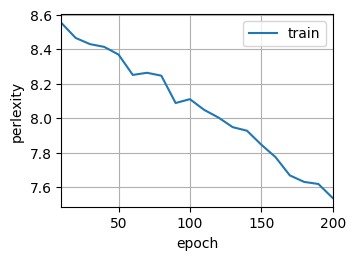

In [39]:
num_epochs, lr = 200, 0.1
# 使用的是顺序抽样. 
train(net, train_iter, vocab, lr, num_epochs, dltools.try_gpu())

困惑度 8.7,  58884.8 词元/秒 cuda:0
time travellere the the the the the the the the the the the the 
travellere the the the the the the the the the the the the 


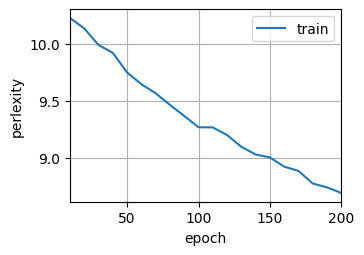

In [38]:
# 使用随机抽样
num_epochs, lr = 200, 0.1

train(net, train_iter, vocab, lr, num_epochs, dltools.try_gpu(), use_random_iter=True)